## Lab 2 -Pitfalls of retrieval - when simple vector search fails! 

In [14]:
import chromadb
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction
import warnings 
warnings.filterwarnings('ignore')

client = chromadb.PersistentClient('Microsoft_Report')
embedding_function = SentenceTransformerEmbeddingFunction()

chroma_collection = client.get_collection("microsoft_annual_report_2022")
chroma_collection.count()

166

In [15]:
import umap
import numpy as np
from tqdm import tqdm

embeddings = chroma_collection.get(include=['embeddings'])['embeddings']
umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)

In [5]:
def project_embeddings(embeddings, umap_transform):
    umap_embeddings = np.empty((len(embeddings),2))
    for i, embedding in enumerate(tqdm(embeddings)): 
        umap_embeddings[i] = umap_transform.transform([embedding])
    return umap_embeddings   

In [6]:
projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

100%|██████████| 166/166 [03:21<00:00,  1.21s/it]


(2.8781894564628603, 11.523056375980378, 6.74964747428894, 12.88846459388733)

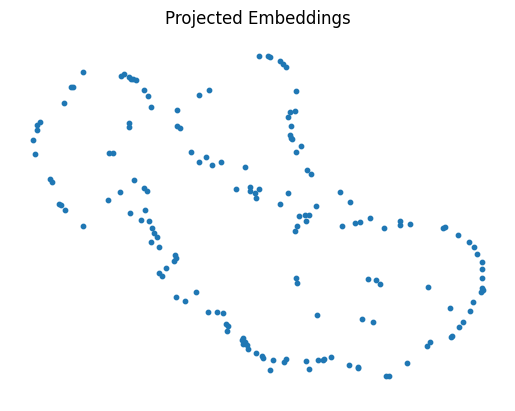

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('Projected Embeddings')
plt.axis('off')

## Relevancy and Distraction

In [19]:
import warnings 
warnings.filterwarnings('ignore')

query = "What is the total revenue?"

results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

( in millions, except percentages ) 2022 2021 percentage change sales and marketing $ 21, 825 $ 20, 117 8 % as a percent of revenue 11 % 12 % ( 1 ) ppt sales and marketing expenses include payroll, employee benefits, stock - based compensation expense, and other headcount - related expenses associated with sales and marketing personnel, and the costs of advertising, promotions, trade shows, seminars, and other programs. sales and marketing expenses increased $ 1. 7 billion or 8 % driven by investments in commercial sales and linkedin. sales and marketing included a favorable foreign currency impact of 2 %. general and administrative ( in millions, except percentages ) 2022 2021 percentage change general and administrative $ 5, 900 $ 5, 107 16 % as a percent of revenue 3 % 3 % 0ppt

37 general and administrative expenses include payroll, employee benefits, stock - based compensation expense, and other headcount - related expenses associated with finance, legal, facilities, certain human

In [24]:
query_embedding = embedding_function([query])[0] # produces a list(list) so we index first value 
retrieved_embeddings = results['embeddings'][0] # same as above 

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:06<00:00,  1.32s/it]


(2.8781894564628603, 11.523056375980378, 6.74964747428894, 12.88846459388733)

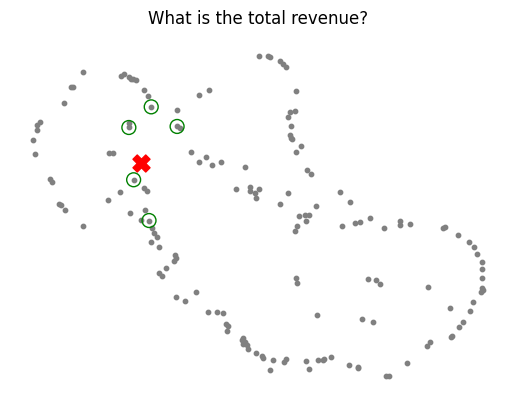

In [12]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [25]:
query = "What is the strategy around artificial intelligence (AI) ?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

culture of trust can help navigate the challenges the world faces today. organizations of all sizes have digitized business - critical functions, redefining what they can expect from their business applications. customers are looking to unlock value while simplifying security and management. from infrastructure and data, to business applications and collaboration, we provide unique, differentiated value to customers. we are building a distributed computing fabric – across cloud and the edge – to help every organization build, run, and manage mission - critical workloads anywhere. in the next phase of innovation, artificial intelligence ( “ ai ” ) capabilities are rapidly advancing, fueled by data and knowledge of the world. we are enabling metaverse experiences at all layers of our stack, so customers can more effectively model, automate, simulate, and predict changes within their industrial

every organization turn its data into predictive and analytical power. with our new microsoft 

In [26]:
query_embedding = embedding_function([query])[0] # produces a list(list) so we index first value 
retrieved_embeddings = results['embeddings'][0] # same as above

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:07<00:00,  1.48s/it]


(2.8781894564628603, 11.523056375980378, 6.74964747428894, 12.88846459388733)

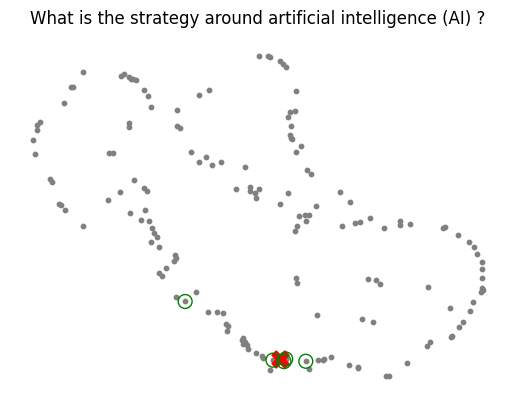

In [27]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [28]:
query = "What has been the investment in research and development?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

• operating expenses increased $ 1. 5 billion or 14 % driven by investments in gaming, search and news advertising, and windows marketing. operating expenses research and development ( in millions, except percentages ) 2022 2021 percentage change research and development $ 24, 512 $ 20, 716 18 % as a percent of revenue 12 % 12 % 0ppt research and development expenses include payroll, employee benefits, stock - based compensation expense, and other headcount - related expenses associated with product development. research and development expenses also include third - party development and programming costs, localization costs incurred to translate software for international markets, and the amortization of purchased software code and services content. research and development expenses increased $ 3. 8 billion or 18 % driven by investments in cloud engineering, gaming, and linkedin. sales and marketing

competitive in local markets and enables us to continue to attract top talent from ac

In [29]:
query_embedding = embedding_function([query])[0] # produces a list(list) so we index first value 
retrieved_embeddings = results['embeddings'][0] # same as above

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:06<00:00,  1.36s/it]


(2.8781894564628603, 11.523056375980378, 6.74964747428894, 12.88846459388733)

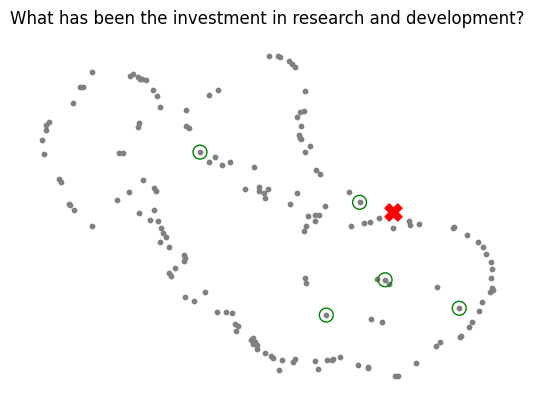

In [30]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')

In [31]:
query = "What has Michael Jordan done for us lately?"
results = chroma_collection.query(query_texts=query, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents'][0]

for document in results['documents'][0]:
    print(document)
    print('')

we use metrics in assessing the performance of our business and to make informed decisions regarding the allocation of resources. we disclose metrics to enable investors to evaluate progress against our ambitions, provide transparency into performance trends, and reflect the continued evolution of our products and services. our commercial and other business metrics are fundamentally connected based on how customers use our products and

18 total rewards we develop dynamic, sustainable, market - driven, and strategic programs with the goal of providing a highly differentiated portfolio to attract, reward, and retain top talent and enable our employees to thrive. these programs reinforce our culture and values such as collaboration and growth mindset. managers evaluate and recommend rewards based on, for example, how well we leverage the work of others and contribute to the success of our colleagues. we monitor pay equity and career progress across multiple dimensions. as part of our eff

In [32]:
query_embedding = embedding_function([query])[0] # produces a list(list) so we index first value 
retrieved_embeddings = results['embeddings'][0] # same as above

projected_query_embedding = project_embeddings([query_embedding], umap_transform)
projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:06<00:00,  1.35s/it]


(2.8781894564628603, 11.523056375980378, 6.74964747428894, 12.88846459388733)

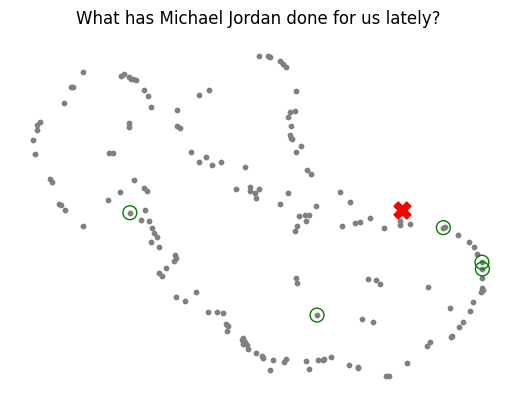

In [33]:
# Plot the projected query and retrieved documents in the embedding space
plt.figure()
plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
plt.scatter(projected_query_embedding[:, 0], projected_query_embedding[:, 1], s=150, marker='X', color='r')
plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')

plt.gca().set_aspect('equal', 'datalim')
plt.title(f'{query}')
plt.axis('off')